<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/da04_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 모듈 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# `matplotlib.pyplot` 모듈을 사용한 데이터 시각화

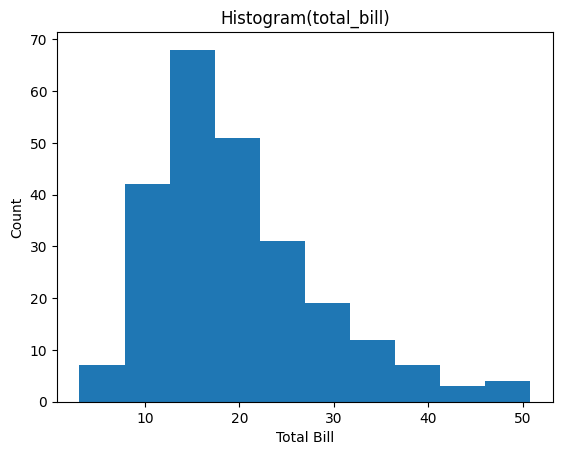

In [5]:
# 1. Figure 객체 생성
fig = plt.figure()

# 2. Figure 객체에 Axes 설정 - Subplot을 생성.
# axis = fig.add_subplot(1, 1, 1)  # add_subplot(nrows, ncols, index)
axis = fig.add_subplot(111)  # add_subplot(pos): '행/열/인덱스' 순서로 만들어진 3자리 정수

# 3. Axis에 그래프를 그림.
axis.hist(x=tips.total_bill)

# 4. 그래프 옵션 설정
axis.set_title('Histogram(total_bill)')
axis.set_xlabel('Total Bill')
axis.set_ylabel('Count')

# 5. 그래프 보여주기.
plt.show()

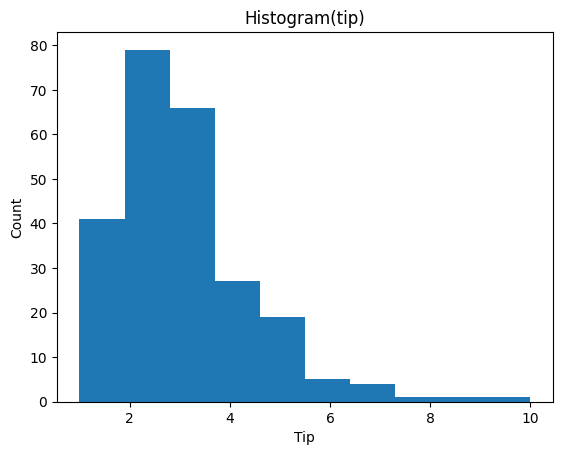

In [6]:
# 1. Figure, Axes 객체 생성
fig, axis = plt.subplots()  # subplots의 파라미터 nrows, ncols의 기본값 1

# 2. 그래프 그림
axis.hist(x=tips.tip)

# 3. 옵션 설정 - Axes 객체의 메서드 이용
axis.set_title('Histogram(tip)')
axis.set_xlabel('Tip')
axis.set_ylabel('Count')

# 4. 그래프 보여줌
plt.show()

1개의 Figure에 1개의 Subplot(Axes)만 있는 경우에는 matplotlib.pyplot 모듈의 top-level 그래프 함수(plot, scatter, hist, boxplot, ...)만 이용할 수 있음.

top-level 그래프 함수를 사용하면 Figure, Axes 객체를 생성하는 코드를 작성할 필요가 없음.

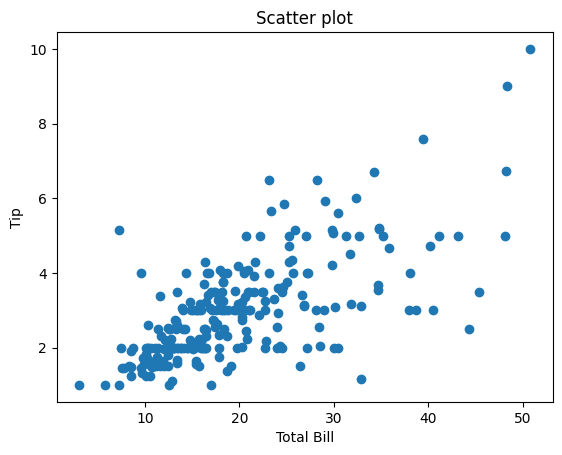

In [7]:
# 그래프 그림(Figure 생성, Axes 생성)
plt.scatter(x=tips.total_bill, y=tips.tip)

# 옵션 설정 - plt 모듈의 top-level 함수 이용
plt.title('Scatter plot')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

# 그래프 보여주기
plt.show()

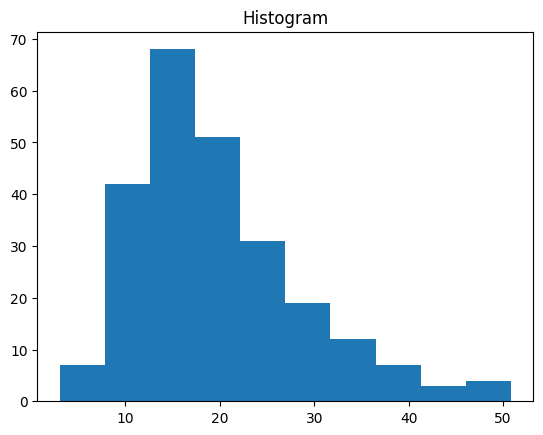

In [8]:
plt.hist(x=tips.total_bill)
plt.title('Histogram')
plt.show()

# Box Plot(상자 그림)

연속형 자료(숫자 타입 데이터)의 기술 통계량(최솟값, 25%, 중위값(중앙값), 75%, 최댓값)과 이상치(outlier)를 상자 모양으로 시각화.

In [9]:
tips.total_bill.describe()

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


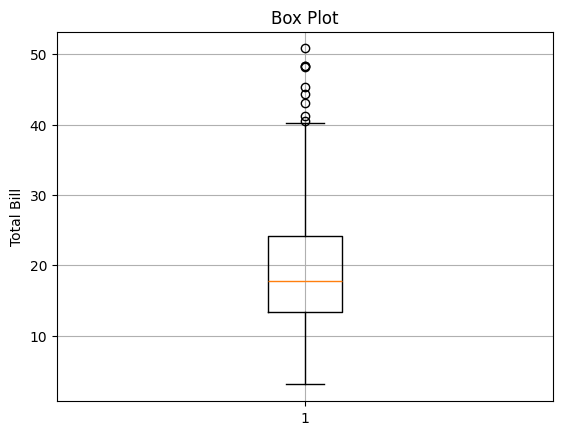

In [10]:
plt.boxplot(x=tips.total_bill)
plt.title('Box Plot')
plt.ylabel('Total Bill')
plt.grid()
plt.show()

In [11]:
tips[['total_bill', 'tip']].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


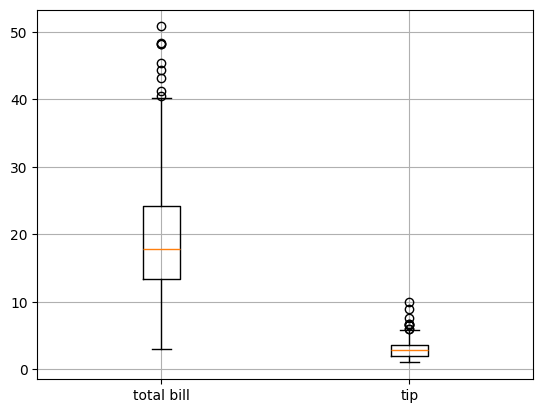

In [12]:
plt.boxplot(x=[tips.total_bill, tips.tip],
            tick_labels=['total bill', 'tip'])
plt.grid()
plt.show()

1개의 Figure에 2개의 Subplot(Axes)을 좌/우로 배치. 왼쪽에는 total_bill의 box plot을, 오른쪽에는 tip의 box plot을 시각화.

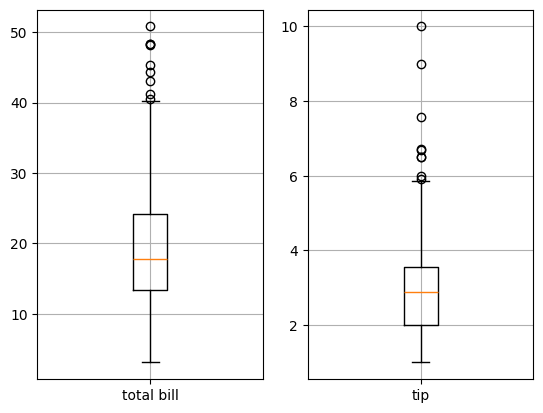

In [13]:
fig = plt.figure()  # Figure 객체 생성

ax1 = fig.add_subplot(1, 2, 1)  # 첫번째 Axes를 Figure 추가 fig.add_subplot(111)
ax2 = fig.add_subplot(122)  # 두번째 Axes를 추가

ax1.boxplot(x=tips.total_bill, tick_labels=['total bill'])
ax2.boxplot(x=tips.tip, tick_labels=['tip'])

ax1.grid()
ax2.grid()

plt.show()

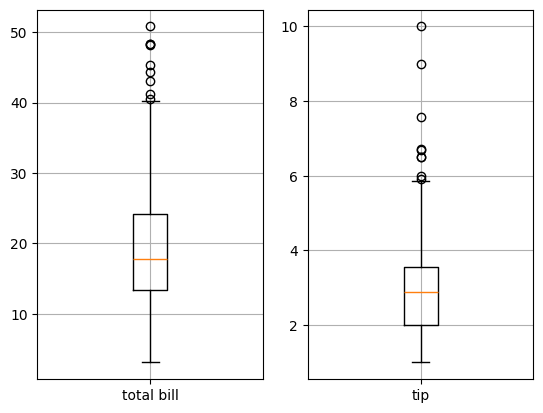

In [14]:
fig, axes = plt.subplots(ncols=2)
# print(type(axes))  #> ndarray(배열)
# print(axes)  #> Axes 객체 2개를 저장하는 배열

axes[0].boxplot(x=tips.total_bill, tick_labels=['total bill'])
axes[1].boxplot(x=tips.tip, tick_labels=['tip'])

axes[0].grid()
axes[1].grid()

plt.show()

## 성별 팁의 box plot

*   남성(Male) tip의 기술 통계량 출력
*   여성(Female) tip의 기술 통계량 출력
*   성별 tip의 box plot을 1개의 Axes에 시각화.

In [15]:
male_tips = tips[tips.sex == 'Male'].tip
male_tips.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [16]:
female_tips = tips[tips.sex == 'Female'].tip
female_tips.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


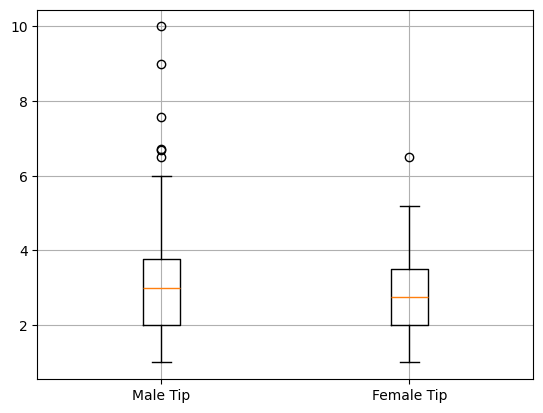

In [17]:
plt.boxplot(x=[male_tips, female_tips],
            tick_labels=['Male Tip', 'Female Tip'])
plt.grid()
plt.show()

## 시간(Lunch, Dinner)별 tip의 box plot

In [18]:
lunch_tips = tips[tips.time == 'Lunch'].tip
lunch_tips.describe()

,tip
count,68.000000
mean,2.728088
std,1.205345
min,1.250000
25%,2.000000
50%,2.250000
75%,3.287500
max,6.700000


In [19]:
dinner_tips = tips[tips.time == 'Dinner'].tip
dinner_tips.describe()

,tip
count,176.000000
mean,3.102670
std,1.436243
min,1.000000
25%,2.000000
50%,3.000000
75%,3.687500
max,10.000000


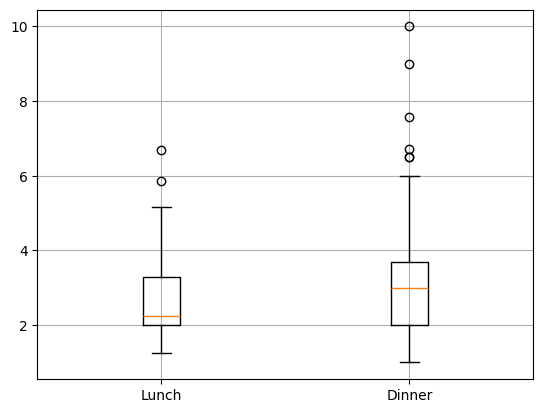

In [20]:
plt.boxplot(x=[lunch_tips, dinner_tips],
            tick_labels=['Lunch', 'Dinner'])
plt.grid()
plt.show()

## 요일별 tip의 box plot

In [21]:
tips.day.unique()  #> DataFrame에서 값이 등장하는 순서로 유일한 값들을 리턴.

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [22]:
tips.day.cat.categories  #> data_frame.column.cat.categories: 카테고리 객체

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

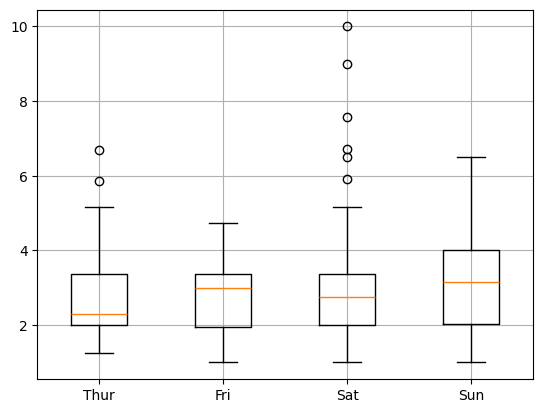

In [23]:
# 카테고리 객체는 배열처럼 for-in 반복문에서 사용할 수 있는 iterable 타입

data = []  # 요일별 tip 컬럼들을 저장하기 위한 빈 리스트
for c in tips.day.cat.categories:
    tip_by_day = tips[tips.day == c].tip
    data.append(tip_by_day)

plt.boxplot(x=data, tick_labels=tips.day.cat.categories)
plt.grid()
plt.show()

# Histogram(히스토그램)

연속형 자료(숫자 타입 데이터)를 구간으로 나눠서 구간 안에 포함된 자료의 개수를 막대로 시각화한 그래프.

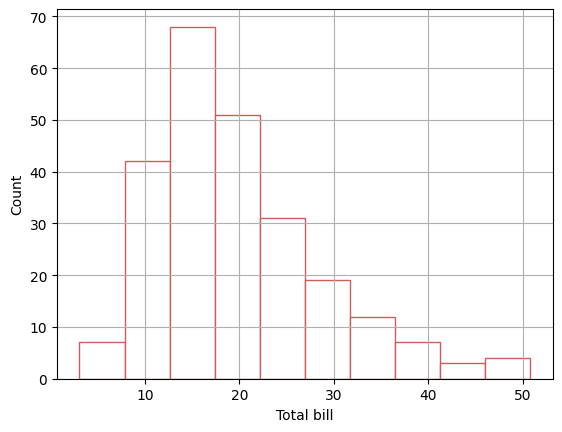

In [24]:
plt.hist(x=tips.total_bill,     # x=히스토그램을 그리기 위한 연속형 자료(변수, 컬럼)
         bins=10,               # bins=막대 개수 또는 구간(배열)
         edgecolor='IndianRed', # edgecolor=막대 테두리 색깔
         color='white')         # color=막대 내부를 채우는 색깔
plt.grid()
# plt.yticks([0, 10, 30, 50, 60])
plt.xlabel('Total bill')
plt.ylabel('Count')
plt.show()

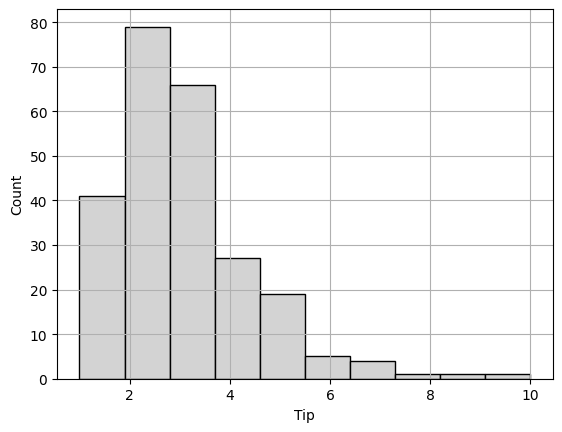

In [25]:
# tip의 히스토그램
plt.hist(x=tips.tip, edgecolor='black', color='LightGray')
plt.grid()
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()

# Bar Plot(막대 그래프)

카테고리(범주) 타입의 변수(컬럼)의 빈도수를 막대로 표현한 그래프.

## 세로 막대 그래프(vertical bar plot)

In [26]:
gender_count = tips.sex.value_counts()
gender_count

,count
sex,
Male,157
Female,87


In [27]:
print(type(gender_count))

<class 'pandas.core.series.Series'>


In [28]:
gender_count.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category', name='sex')

In [29]:
gender_count.values

array([157,  87])

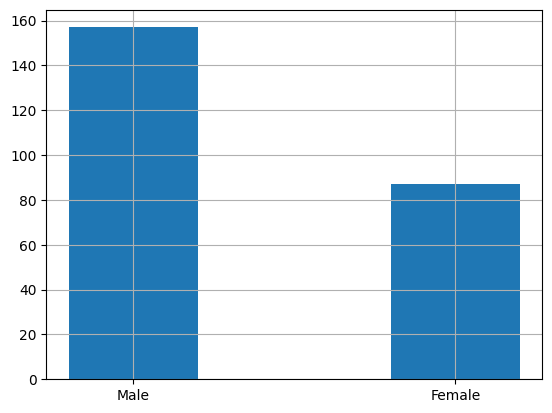

In [30]:
plt.bar(x=gender_count.index, height=gender_count.values,
        width=0.4)
plt.grid()
plt.show()

## 가로 막대 그래프(horizontal bar plot)

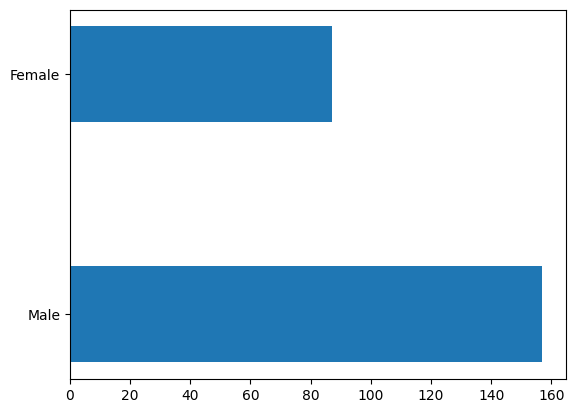

In [31]:
plt.barh(y=gender_count.index,
         width=gender_count.values,
         height=0.4)
plt.show()

테이블의 손님 수(size)의 빈도수를 세로 막대 그래프로 시각화.

In [32]:
size_count = tips['size'].value_counts()
size_count

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


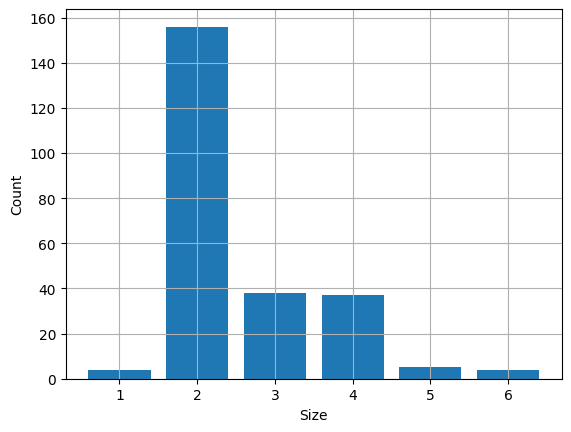

In [33]:
plt.bar(x=size_count.index, height=size_count.values)
plt.xlabel('Size')
plt.ylabel('Count')
plt.grid()
plt.show()

요일의 빈도수를 가로 막대 그래프로 시각화

In [34]:
day_count = tips.day.value_counts()
day_count

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


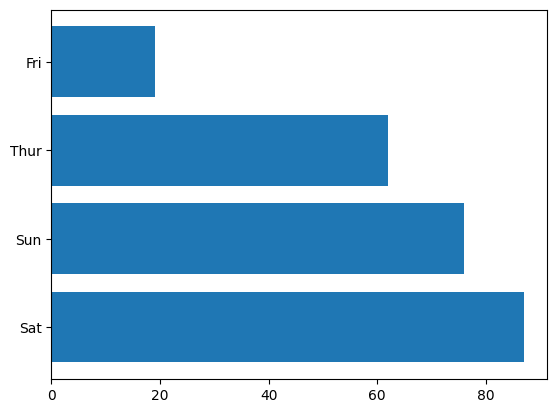

In [35]:
plt.barh(y=day_count.index, width=day_count.values)
plt.show()

*   4개의 Axes(subplot)를 2x2 모양(nrows=2, ncols=2)으로 생성
*   각 Axes에 성별 빈도수, 흡연여부 빈도수, 요일 빈도수, 시간 빈도수 막대 그래프를 그리세요.

In [36]:
gender_count = tips.sex.value_counts()
smoker_count = tips.smoker.value_counts()
day_count = tips.day.value_counts()
time_count = tips.time.value_counts()

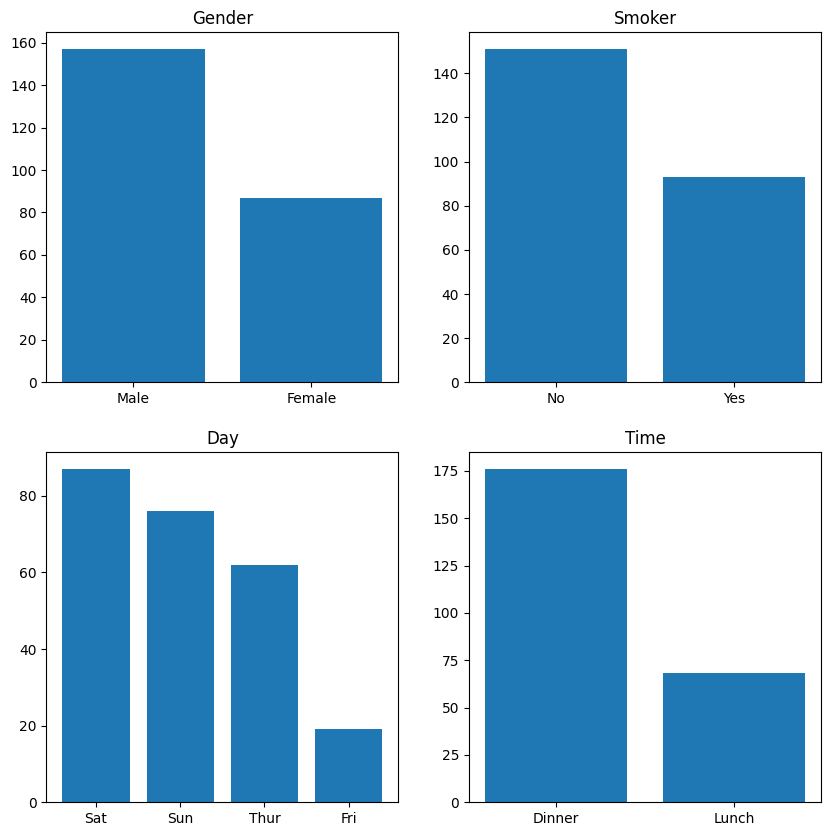

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# print(axes)  #> 2차원 ndarray

axes[0, 0].bar(x=gender_count.index,
               height=gender_count.values)
axes[0, 0].set_title('Gender')
axes[0, 1].bar(x=smoker_count.index,
               height=smoker_count.values)
axes[0, 1].set_title('Smoker')
axes[1, 0].bar(x=day_count.index,
               height=day_count.values)
axes[1, 0].set_title('Day')
axes[1, 1].bar(x=time_count.index,
               height=time_count.values)
axes[1, 1].set_title('Time')

plt.show()

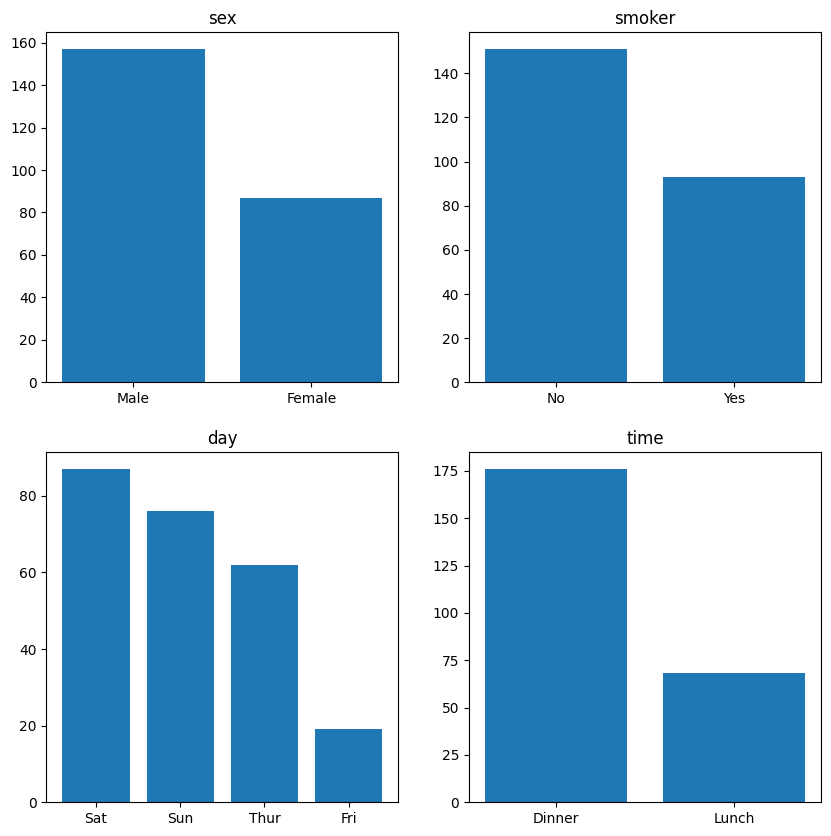

In [38]:
titles = [['sex', 'smoker'], ['day', 'time']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, row in enumerate(titles):
    for j, t in enumerate(row):
        # print(i, j, t)
        data = tips[t].value_counts()
        axes[i, j].bar(x=data.index, height=data.values)
        axes[i, j].set_title(t)

plt.show()

# Scatter Plot(산점도)

*   두 변수(컬럼) 간의 상관 관계를 알고 싶을 때 사용.
*   `y ~ x` 관계 시각화.
    *   `y`: 관심 변수, 종속 변수.
    *   `x`: 독립 변수.

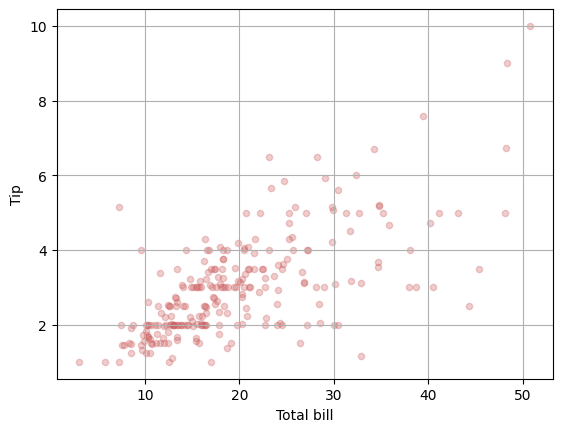

In [39]:
# tip ~ total_bill 상관 관계
plt.scatter(x=tips.total_bill, y=tips.tip,  # x, y: x축, y축에 사용할 변수(컬럼)
            alpha=0.3,      # alpha: 투명도(0=투명, 1=불투명)
            s=20,           # s: size. 마커(점)의 크기.
            c='IndianRed',  # c: color. 마커(점)의 색깔.
            marker='o')     # marker: 마커(점)의 모양(o, s, v, ^, *, +, ...).
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid()
plt.show()

*   tip ~ total_bill 상관 관계를 산점도로 시각화.
*   성별에 따라서 마커의 색깔을 다르게 표시.

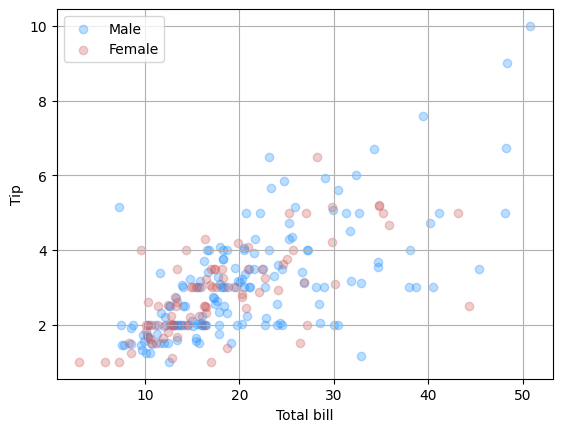

In [40]:
male_df = tips[tips.sex == 'Male']
female_df = tips[tips.sex == 'Female']

plt.scatter(x=male_df.total_bill, y=male_df.tip, alpha=0.3, label='Male', c='DodgerBlue')
plt.scatter(x=female_df.total_bill, y=female_df.tip, alpha=0.3, label='Female', c='IndianRed')

plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.legend()  # 범례 표시 - 각각의 산점도의 레이블을 표시.
plt.grid()

plt.show()

*   tip ~ total_bill 산점도
*   성별에 따라서 마커의 색깔을 다르게 지정.
*   흡연여부에 따라서 마커의 모양을 다르게 지정.

In [41]:
tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [42]:
tips.smoker.unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

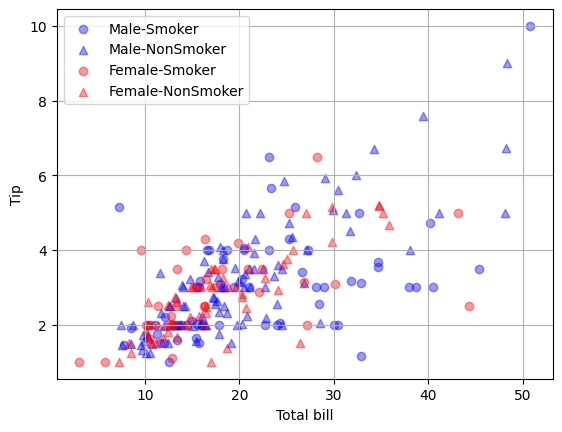

In [56]:
male_smoker = tips[(tips.sex == 'Male') & (tips.smoker == 'Yes')]
male_nonsmoker = tips[(tips.sex == 'Male') & (tips.smoker == 'No')]
female_smoker = tips[(tips.sex == 'Female') & (tips.smoker == 'Yes')]
female_nonsmoker = tips[(tips.sex == 'Female') & (tips.smoker == 'No')]

plt.scatter(x=male_smoker.total_bill, y=male_smoker.tip,
            alpha=0.4,
            c='blue',
            marker='o',
            label='Male-Smoker')
plt.scatter(x=male_nonsmoker.total_bill, y=male_nonsmoker.tip,
            alpha=0.4,
            c='blue',
            marker='^',
            label='Male-NonSmoker')
plt.scatter(x=female_smoker.total_bill, y=female_smoker.tip,
            alpha=0.4,
            c='red',
            marker='o',
            label='Female-Smoker')
plt.scatter(x=female_nonsmoker.total_bill, y=female_nonsmoker.tip,
            alpha=0.4,
            c='red',
            marker='^',
            label='Female-NonSmoker')

plt.legend()  # 각각의 scatter 함수의 label을 범례 표시.
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid()

plt.show()

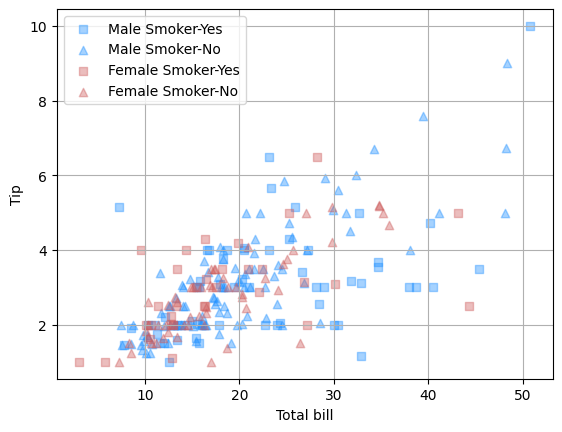

In [64]:
gender = tips.sex.cat.categories  # tips.sex.unique()
smoker = tips.smoker.cat.categories
colors = ['DodgerBlue', 'IndianRed']  # 성별에 따라서 다르게 표시할 마커 색깔 이름
markers = ['s', '^']  # 흡연여부에 따라서 다르게 표시할 마커 모양

for g, c in zip(gender, colors):
    for s, m in zip(smoker, markers):
        subset_df = tips[(tips.sex == g) & (tips.smoker == s)]
        plt.scatter(x=subset_df.total_bill, y=subset_df.tip,
                    alpha=0.4, c=c, marker=m,
                    label=f'{g} Smoker-{s}')

plt.legend()
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid()

plt.show()

*   1개의 Figure에 상/하 2개의 Axes를 생성
*   위쪽 Axes에 total_bill 히스토그램을 작성
*   아래쪽 Axes에 tip ~ total_bill 산점도를 작성.

# Line plot(선 그래프)

주로 시계열 데이터(주식, 부동산, 지지율, 원자재 가격, 미세먼지 농도, ...)를 시각화.

In [65]:
# 선 그래프를 그리기 위한 가상 데이터
np.random.seed(1)
df = pd.DataFrame(data={
    'day': np.arange(1, 11),
    'price': np.random.rand(10)
})
df

,day,price
0,1,0.417022
1,2,0.720324
2,3,0.000114
3,4,0.302333
4,5,0.146756
5,6,0.092339
6,7,0.186260
7,8,0.345561
8,9,0.396767
9,10,0.538817


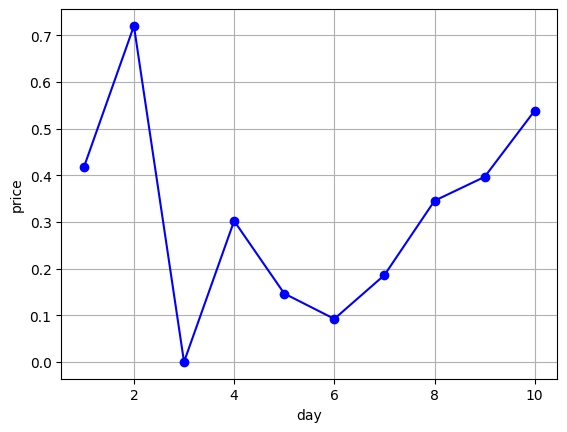

In [83]:
# plt.plot(x 좌표로 사용할 변수, y 좌표로 사용할 변수, 포맷 문자열)
# 포맷 문자열: color(선과 마커의 색깔), marker(마커 모양), linestyle(선 스타일/모양) 정보를 문자열로 만듦.
#   color: r(red), g(green), b(blue), k(black), ...
#   marker: o, s, ^, v, *, +, ...
#   linestyle: -(직선, solid line), --(dashed line), :(점선, dotted line), ...
plt.plot(df.day, df.price, 'bo-')

plt.xlabel('day')
plt.ylabel('price')
plt.grid()

plt.show()

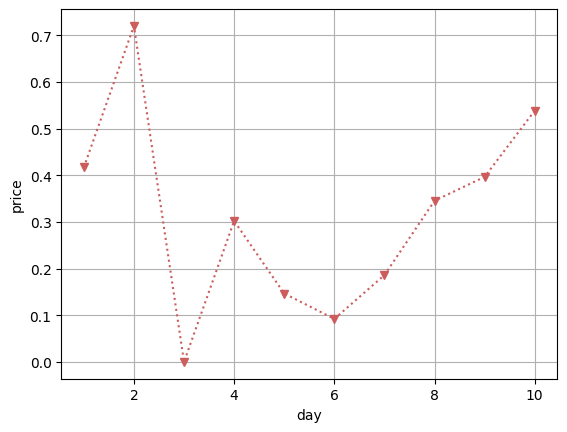

In [98]:
plt.plot(df.day, df.price,
         color='IndianRed', linestyle='dotted', marker='v')

plt.grid()
plt.xlabel('day')
plt.ylabel('price')

plt.show()

# 연습문제 1.

아래의 데이터 프레임에서 samsung, hynix, nvidia 데이터를 선 그래프로 그리세요.
*   선 그래프 3개가 함께 표현
*   각각의 데이터는 다른 색깔, 마커, 선 스타일로 표현
*   범례 표시


In [100]:
np.random.seed(1)
df = pd.DataFrame({
    'samsung': np.random.rand(10),
    'hynix': np.random.rand(10),
    'nvidia': np.random.rand(10)
})
df

,samsung,hynix,nvidia
0,0.417022,0.419195,0.800745
1,0.720324,0.685220,0.968262
2,0.000114,0.204452,0.313424
3,0.302333,0.878117,0.692323
4,0.146756,0.027388,0.876389
5,0.092339,0.670468,0.894607
6,0.186260,0.417305,0.085044
7,0.345561,0.558690,0.039055
8,0.396767,0.140387,0.169830
9,0.538817,0.198101,0.878143


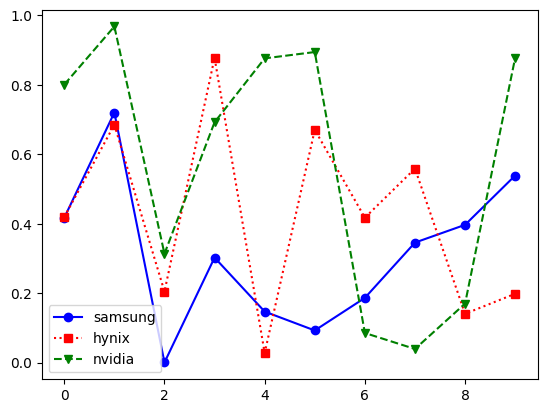

In [107]:
plt.plot(df.samsung, 'bo-', label='samsung')
plt.plot(df.hynix, 'rs:', label='hynix')
plt.plot(df.nvidia, 'gv--', label='nvidia')

plt.legend()

plt.show()

# 연습문제 2.

iris 데이터셋 시각화.
*   seaborn 패키지의 iris 예제 데이터셋 로드
*   DataFrame 확인(`head`, `info`, `describe`, `value_counts` 등)
*   petal_width ~ petal_length 산점도
    *   species 별로 마커의 색깔을 다르게 표현


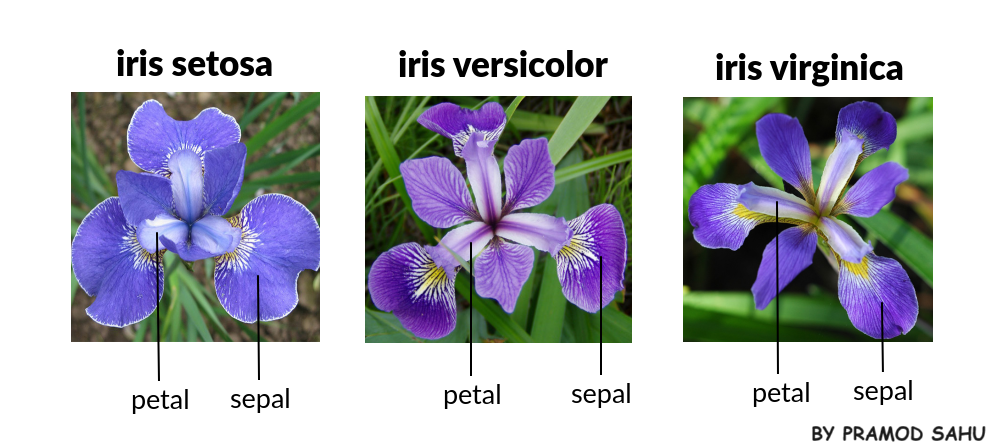

In [108]:
iris = sns.load_dataset('iris')

In [109]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [110]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [111]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica
